In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Exploratory Data Analysis


In [24]:
df = pd.read_excel("marketing_data.xlsx")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05 00:00:00,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04 00:00:00,0,6,...,11,0,34,2,3,1,2,7,1,0


#### Data Profiling


In [25]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

In [26]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

#### Unique Values for Categorical Variables


In [27]:
for col in ['Education', 'Marital_Status']:
    print(f"Unique values in {col}:", df[col].unique())

Unique values in Education: ['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']
Unique values in Marital_Status: ['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']


#### Univariate Analysis


Distribution of Complains


Text(0.5, 1.0, 'Distribution of Complains')

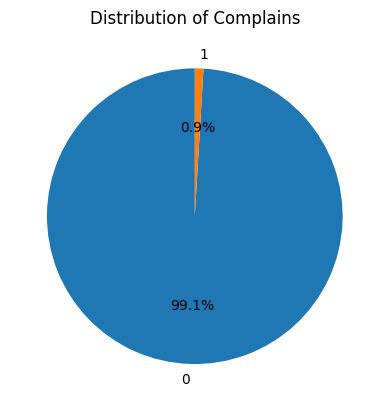

In [28]:
plt.pie(df['Complain'].value_counts(), labels=df['Complain'].value_counts(
).index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Complains')

Distribution of Education


Text(0.5, 1.0, 'Distribution of Education')

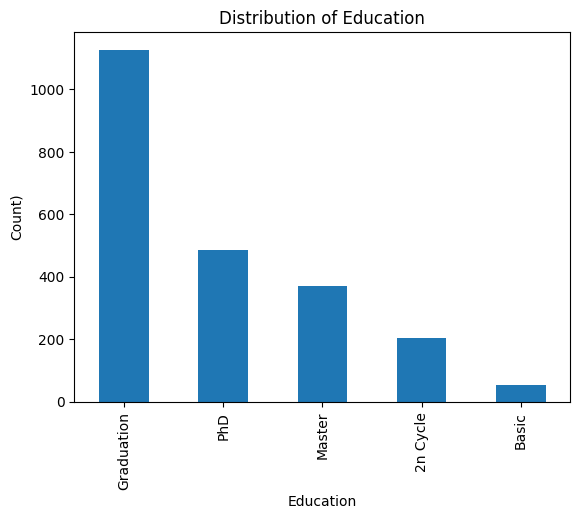

In [29]:
df['Education'].value_counts().plot(kind='bar')
plt.xlabel('Education')
plt.ylabel('Count)')
plt.title('Distribution of Education')

Distribution of Income


Text(0.5, 1.0, 'Distribution of Income')

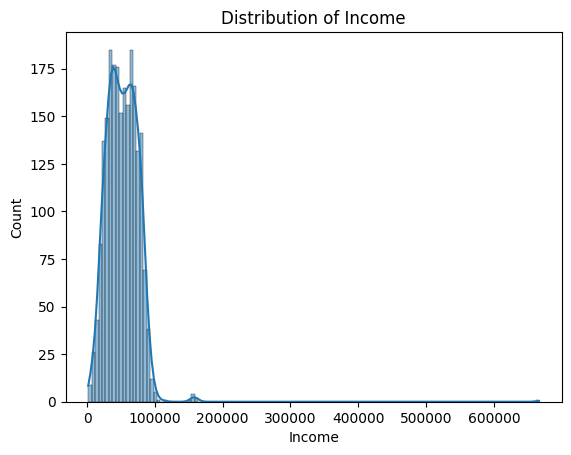

In [30]:
sns.histplot(df['Income'], kde=True)
plt.xlabel('Income')
plt.title('Distribution of Income')

Distribution of Marital Status


Text(0, 0.5, 'Count')

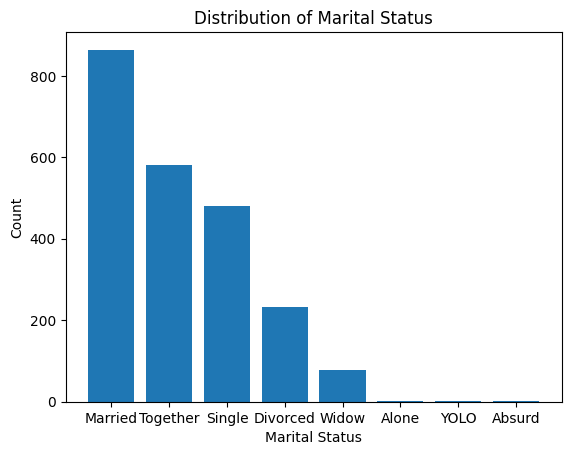

In [31]:
plt.bar(df['Marital_Status'].value_counts().index,
        df['Marital_Status'].value_counts().values)
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')

#### Bivariate Analysis


Relationship of Year of Birth and Income


Text(0.5, 1.0, 'Relationship of Year of Birth and Income')

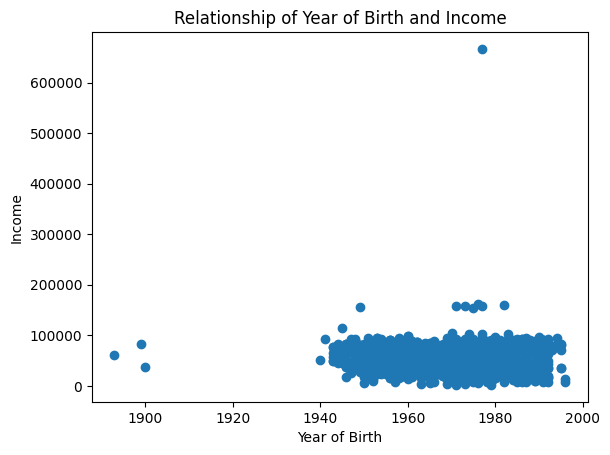

In [32]:
plt.scatter(df['Year_Birth'], df['Income'])
plt.xlabel('Year of Birth')
plt.ylabel('Income')
plt.title('Relationship of Year of Birth and Income')

Average Income by Marital Status


Text(0.5, 1.0, 'Average Income by Marital Status')

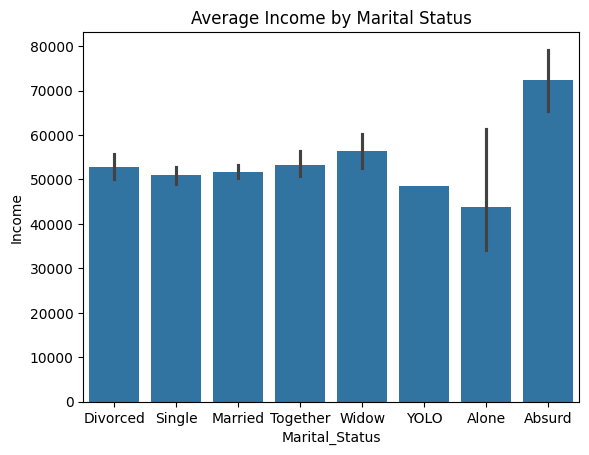

In [33]:
sns.barplot(x='Marital_Status', y='Income', data=df)
plt.title('Average Income by Marital Status')

Relationship of Kidhome and Marital Status


Text(0.5, 1.0, 'Relationship of Kidhome and Marital Status')

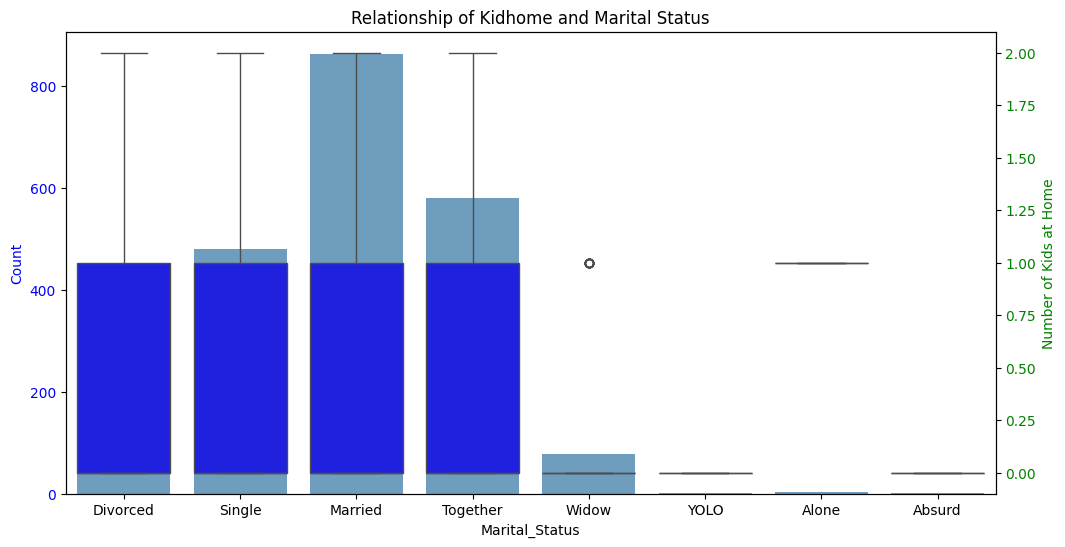

In [34]:
fig, ax1 = plt.subplots(figsize=(12, 6))

sns.countplot(data=df, x='Marital_Status', ax=ax1, alpha=0.7)
ax1.set_ylabel('Count', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()

sns.boxplot(data=df, x='Marital_Status', y='Kidhome', ax=ax2, color="blue")
ax2.set_ylabel('Number of Kids at Home', color='g')
ax2.tick_params(axis='y', labelcolor='g')

plt.title('Relationship of Kidhome and Marital Status')

Relationship of Kidhome and Marital Status


Text(0.5, 1.0, 'Relationship of Teenhome and Marital Status')

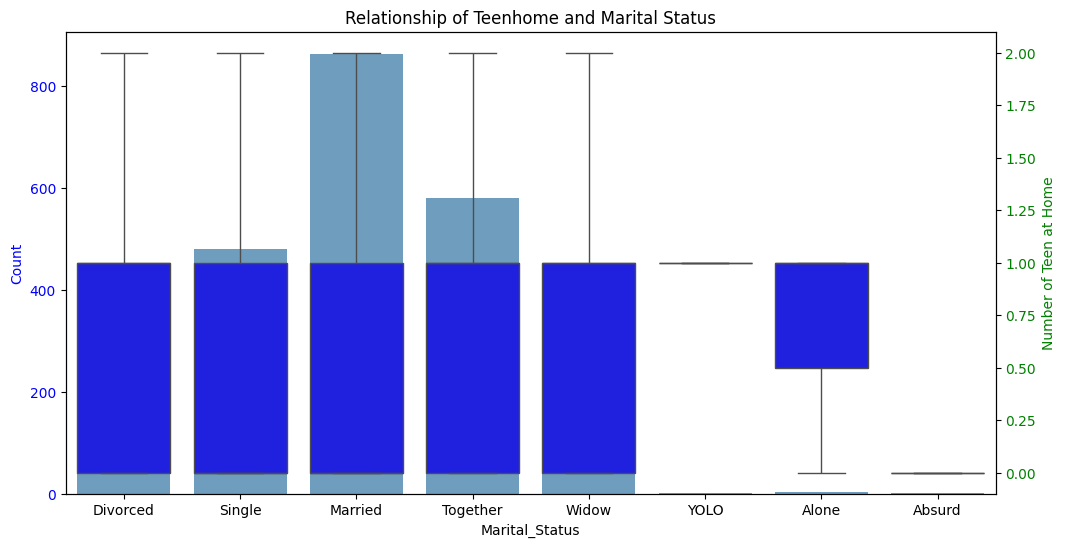

In [35]:
fig, ax1 = plt.subplots(figsize=(12, 6))

sns.countplot(data=df, x='Marital_Status', ax=ax1, alpha=0.7)
ax1.set_ylabel('Count', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()

sns.boxplot(data=df, x='Marital_Status', y='Teenhome', ax=ax2, color="blue")
ax2.set_ylabel('Number of Teen at Home', color='g')
ax2.tick_params(axis='y', labelcolor='g')

plt.title('Relationship of Teenhome and Marital Status')

#### Check the relationship between/among features using statistics


Check correlation between Income and Education


In [36]:
education_income_values = pd.get_dummies(
    df, columns=['Education'], prefix='Education')

education_columns = [
    col for col in education_income_values.columns if 'Education_' in col]
income_education_correlation = education_income_values[[
    'Income'] + education_columns].corr()['Income'][1:]

print("Correlation between Income and Education Levels:")
print(income_education_correlation)

Correlation between Income and Education Levels:
Education_2n Cycle     -0.057745
Education_Basic        -0.200576
Education_Graduation    0.018935
Education_Master        0.011827
Education_PhD           0.081552
Name: Income, dtype: float64


- All the relationships here are weak, indicating that education level is not a strong predictor of income of customers


Check association between Complain and Education


In [37]:
from scipy.stats import chi2_contingency

education_contingency_table = pd.crosstab(df['Education'], df['Complain'])
chi2, p, dof, expected = chi2_contingency(education_contingency_table)
print(f"Chi-square Test: p-value = {p}")

Chi-square Test: p-value = 0.11620258344593623


- All the relationships here are weak, indicating that education level is not a strong predictor of income of customers


Check correlation between Income and Marital Status


In [38]:
marital_income_values = pd.get_dummies(
    df, columns=['Marital_Status'], prefix='Marital_Status')

marital_columns = [
    col for col in marital_income_values.columns if 'Marital_Status_' in col]
income_marital_correlation = marital_income_values[[
    'Income'] + marital_columns].corr()['Income'][1:]

print("Correlation between Income and Marital Status:")
print(income_marital_correlation)

Correlation between Income and Marital Status:
Marital_Status_Absurd      0.024026
Marital_Status_Alone      -0.012374
Marital_Status_Divorced    0.007975
Marital_Status_Married    -0.016479
Marital_Status_Single     -0.025843
Marital_Status_Together    0.023425
Marital_Status_Widow       0.031706
Marital_Status_YOLO       -0.004556
Name: Income, dtype: float64


- All the relationships here are weak, indicating that marital status is not a strong predictor of income of customers


Check association between Complain and Marital Status


In [39]:
marital_contingency_table = pd.crosstab(df['Marital_Status'], df['Complain'])
chi2, p, dof, expected = chi2_contingency(marital_contingency_table)
print(f"Chi-square Test: p-value = {p}")

Chi-square Test: p-value = 0.9870342644720567


- With the p-value(0.754) being grater than 0.05, this means that there is not enough evidence to associate marital status with the customer complaint in the last 2 years


Check correlation between Marital Status and Kidhome, and Marital Status and Teenhome


In [40]:
kidhome_crosstab = pd.crosstab(
    df['Marital_Status'], df['Kidhome'], margins=True, margins_name="Total")
print("Relationship of Marital Status and Kidhome:")
display(kidhome_crosstab)

teenhome_crosstab = pd.crosstab(
    df['Marital_Status'], df['Teenhome'], margins=True, margins_name="Total")
print("\nRelationship of Marital Status and Teenhome:")
display(teenhome_crosstab)

Relationship of Marital Status and Kidhome:


Kidhome,0,1,2,Total
Marital_Status,,,,
Absurd,2,0,0,2
Alone,0,3,0,3
Divorced,140,88,4,232
Married,491,352,21,864
Single,268,201,11,480
Together,331,237,12,580
Widow,59,18,0,77
YOLO,2,0,0,2
Total,1293,899,48,2240



Relationship of Marital Status and Teenhome:


Teenhome,0,1,2,Total
Marital_Status,,,,
Absurd,2,0,0,2
Alone,1,2,0,3
Divorced,101,125,6,232
Married,444,398,22,864
Single,295,175,10,480
Together,286,281,13,580
Widow,29,47,1,77
YOLO,0,2,0,2
Total,1158,1030,52,2240


Use ANOVA test for these relationships


In [41]:
import scipy.stats as stats

f_val, p_val = stats.f_oneway(*[df[df['Marital_Status'] == status]['Kidhome']
                              for status in df['Marital_Status'].unique()])
print(f"ANOVA test for Kidhome by Marital Status: F = {f_val}, p = {p_val}")

f_val, p_val = stats.f_oneway(*[df[df['Marital_Status'] == status]['Teenhome']
                              for status in df['Marital_Status'].unique()])
print(f"ANOVA test for Teenhome by Marital Status: F = {f_val}, p = {p_val}")

ANOVA test for Kidhome by Marital Status: F = 2.8150772422212915, p = 0.006399583359671683
ANOVA test for Teenhome by Marital Status: F = 4.461449687945867, p = 6.0909780334068225e-05


- The p-value scores show that marital status has a significant impact on both the number of kids and the number of teenagers since they are below the significance level of 0.05


#### Analysis for `Mnt[.]+` and `Num[.]+` columns


The plots below show the skew with all of the `Mnt[.]+` columns


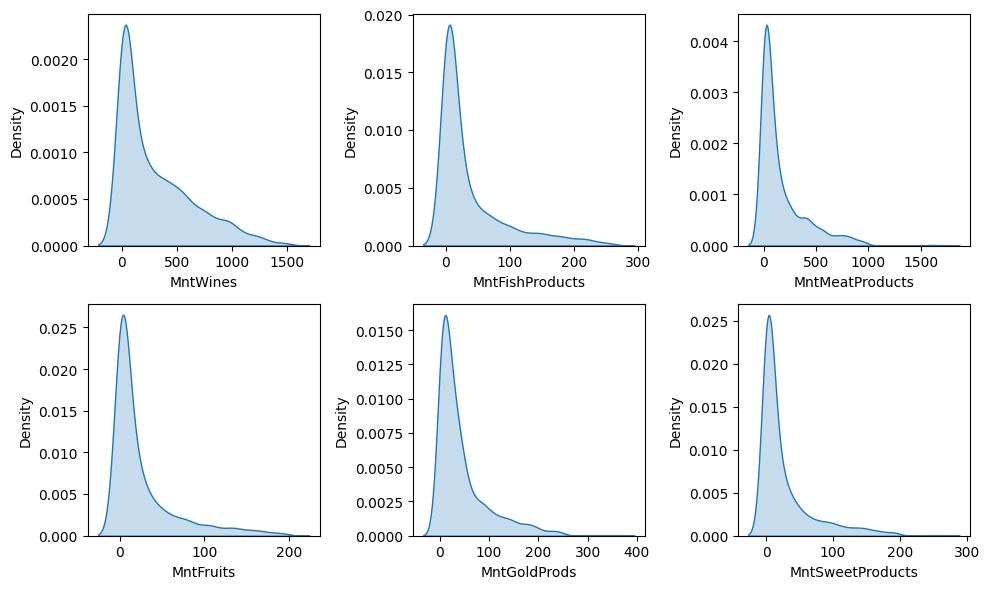

In [42]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6))

for ax, col in zip(axes.flat, ['MntWines', 'MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntGoldProds', 'MntSweetProducts']):
    sns.kdeplot(df, x=col, fill=True, ax=ax)

fig.tight_layout()
plt.show()

The `Num[.]+` columns also have skewness

However, unlike the `Mnt[.]+` columns, they seem to descend much more slowly as the values increase

There might not be a need to remove outliers with these columns

Especially when compared to their `Response` type, the descent seems to be slightly maintained especially with `NumStorePurchases`


NumDealsPurchases skew: 2.4185693876889256
NumCatalogPurchases skew: 1.8809887777711713
NumStorePurchases skew: 0.7022372855251121
NumWebPurchases skew: 1.3827942964035893


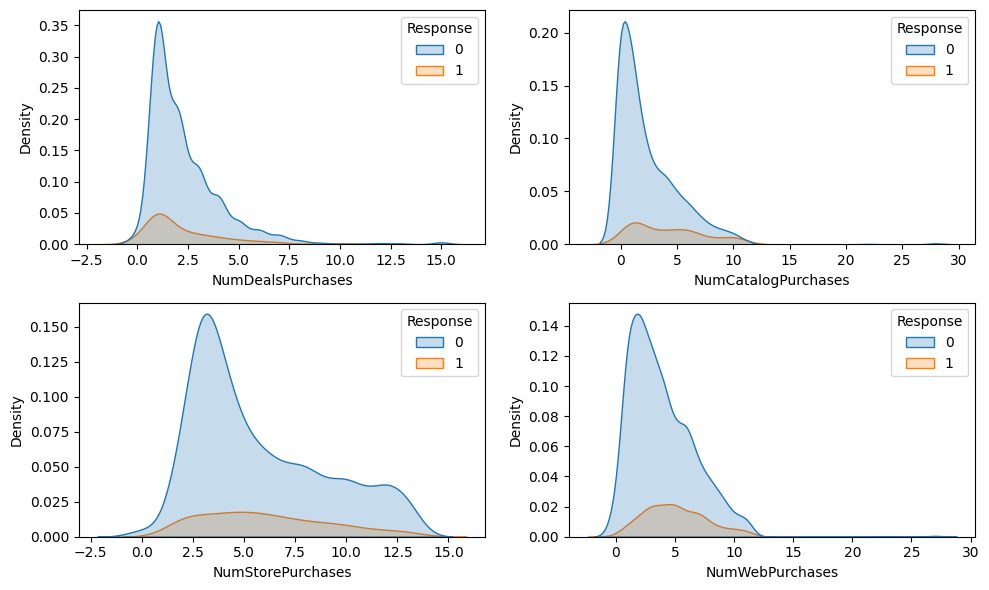

In [43]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

for ax, col in zip(axes.flat, ['NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases']):
    print(f'{col} skew: {df[col].skew()}')
    sns.kdeplot(df, x=col, hue='Response', fill=True, ax=ax)

fig.tight_layout()
plt.show()

The `Response`s seem to increase around where `NumWebVisitsMonth` reaches around 5


<Axes: xlabel='NumWebVisitsMonth', ylabel='Density'>

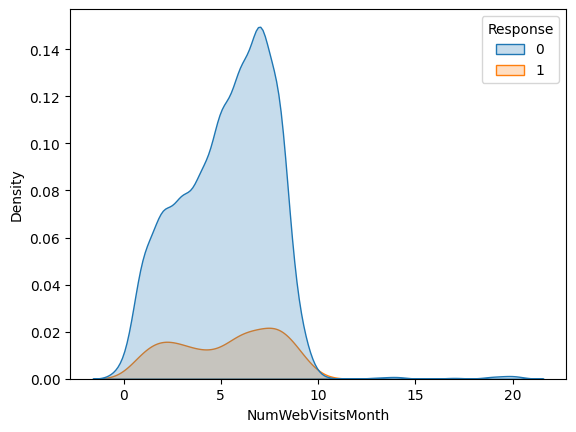

In [44]:
sns.kdeplot(df, x='NumWebVisitsMonth', fill=True, hue='Response')

Overall these columns all show a level of skewness with their data, it's recommended to remove outliers to provide a more consistent representation of data or perform other preprocessing that makes the models more robust to outliers
